In [15]:
import matplotlib.pyplot as plt
import numpy as np
from Functions_invest import mensualité, rendement_1, rendement_2

### Calcul de la mensualité:

$m$ = mensualité

$N$ = Durée du prêt (en années)

$\alpha$ = Taux d'intéret annuel

$C$ = montant du prêt


Au mois $n$, le restant à payer $C_n$ vaut: $C_n = C_{n-1} + \frac{\alpha}{12}C_{n-1}-m = \left(1+\frac{\alpha}{12}\right)C_{n-1}-m$

On reconnaît une suite arithmético-géométrique de terme général: $C_n = \left(1+\frac{\alpha}{12}\right)^n\left(C-\frac{12m}{\alpha}\right)+\frac{12m}\alpha$

Donc à l'année $N$, le restant à payer (qui doit être nul) vaut: $\left(1+\frac{\alpha}{12}\right)^{12N}\left(C-\frac{12m}{\alpha}\right)+\frac{12m}\alpha$. On obtient:

\begin{align}
m = \frac{\frac{\alpha C}{12}}{1-\left(1+\frac{\alpha}{12}\right)^{-12N}}
\end{align}

### Calcul du rendement au mois $n$ < $12N$

- $\mu$ = croissance annuelle du bien immobilier
- $l$ = loyer
- $f_n$ = frais de notaire
- $f_g$ = frais de gestion locative (en % du loyer)
- $A$ = Apport
- $p$ = prélèvements sociaux
- $i$ = impôts

Au bout du mois $n$, le propriétaire possède:
- Le bien immobilier d'une valeur $(1+\frac{\mu}{12})^nC$
- Le cumul des loyers s'élevant à hauteur de $nl$ (dont il faut déduire les impôts et frais de gestion)

Il a dépensé:
- $nm$ en mensualité
- $nf_gl$ en frais de gestion locative
- $f+A$ en apport total
- et est endetté à hauteur de $C_n$

Après réarrangement et calcul de $m$ et $C_n$, son rendement au mois $n$ s'exprime selon:

\begin{align}
\eta = \frac{1}{\%_{,a}}\left(n\left(1-f_g-i\right)\rho-\frac{n\tilde{\alpha}}{1-\left(1+\tilde{\alpha}\right)^{12N}}+\left(1+\tilde{\mu}\right)^n-\frac{\left(1+\tilde{\alpha}\right)^n-\left(1+\tilde{\alpha}\right)^{12N}}{1-\left(1+\tilde{\alpha}\right)^{12N}}\right)
\end{align}

Avec:
- L'apport initial (en pourcentage): $\%_{,a}$ = $\frac{{f_n+A}}{C}$
- Les gains financiers dus aux mensualités: $n\left(1-f_g-i\right)\rho$, faisant apparaître le rendement locatif $\rho=\frac{l}{C}$
- Les mensualités payées à date: $\frac{n\tilde{\alpha}}{1-\left(1+\tilde{\alpha}\right)^{12N}}$ (avec $\tilde{\alpha} = \frac{\alpha}{12}$)
- La valeur du bien actualisée: $\left(1+\tilde{\mu}\right)^n$ (avec $\tilde{\mu} = \frac{\mu}{12}$)
- La dette restante: $\frac{\left(1+\tilde{\alpha}\right)^n-\left(1+\tilde{\alpha}\right)^{12N}}{1-\left(1+\tilde{\alpha}\right)^{12N}}$

Une expression simplifiée obtenue par un développement limité à l'ordre 1 est:
\begin{align}
\eta = \frac{1}{\%_{,a}}\left(n\left(1-f_g-i\right)\rho+n\tilde{\mu}-n\left(1+\frac{1-n}{24N}\right)\tilde{\alpha}\right)
\end{align}

Dans laquelle on peut identifier:
- Les revenus locatifs (premier terme)
- L'évolution de la valeur du bien (deuxième terme)
- Le coût total du crédit (troisième terme)

### Simulation: étude du rendement d'un investissement immobilier vs. boursier

In [73]:
alpha = 3.3/100 # Taux du prêt
N = 20 # Durée totale du prêt
mu = 3/100 # Croissance de la valeur du bien immobilier
C = 50000 # Montant emprunté
l = 500 # Loyer
fn = 5000 # Frais de notaire et d'agence
A = 0 # 10/100*C # Apport
fg = 8/100 # Coûts de gestion locative (en % du loyer)
i = 12.8/100 # impôts sur le revenu

beta = 8/100 # Performance de la bourse
p = 17.2/100 # Prélèvements sociaux

mensualité = 284 €/mois


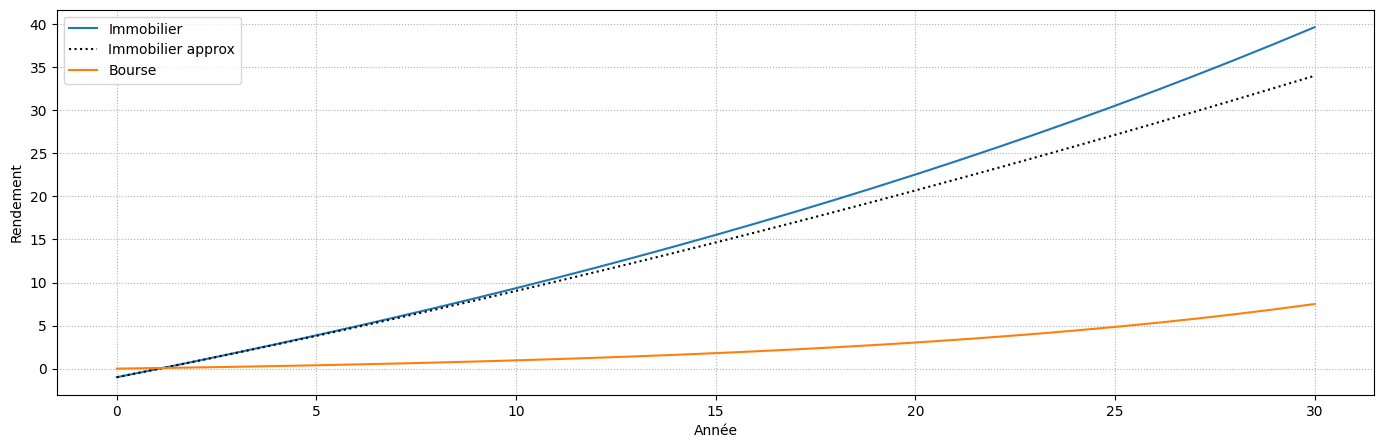

In [74]:
m = mensualité(alpha, C, N)
print("mensualité =", int(m), "€/mois")

List_year = range(0, 31)
List_rendement_immo = []
List_rendement_immo_approx = []
List_rendement_bourse = []

for year in List_year:
    taux_apport, loyer, paiement_mens, valeur_bien, dette = rendement_1(fn, A, 12*year, l, C, fg, i, alpha, N, mu)
    List_rendement_immo.append([1/taux_apport*(loyer-paiement_mens+valeur_bien-dette)-1])
    List_rendement_immo_approx.append(12*year*C/(fn+A)*((1-fg-i)*l/C-(1+(1-12*year)/24/N)*alpha/12+mu/12)-1)
    List_rendement_bourse.append(((1+beta)**year-1)*(1-p))

plt.figure(figsize=(17, 5))
plt.plot(List_year, List_rendement_immo, label='Immobilier')
plt.plot(List_year, List_rendement_immo_approx, label='Immobilier approx', linestyle=':', color='black')
plt.plot(List_year, List_rendement_bourse, label='Bourse')
plt.xlabel('Année')
plt.ylabel('Rendement')
plt.grid(linestyle=':')
plt.legend()

### Scénarios d'investissement locatif

In [96]:
alpha = 3.2/100 # Taux du prêt
N = 20 # Durée totale du prêt
mu = 3/100 # Croissance de la valeur du bien immobilier
fg = 8/100 # Coûts de gestion locative (en % du loyer)
i = 12.8/100 # impôts sur le revenu
year = 12

beta = 8/100 # Performance de la bourse
p = 17.2/100 # Prélèvements sociaux

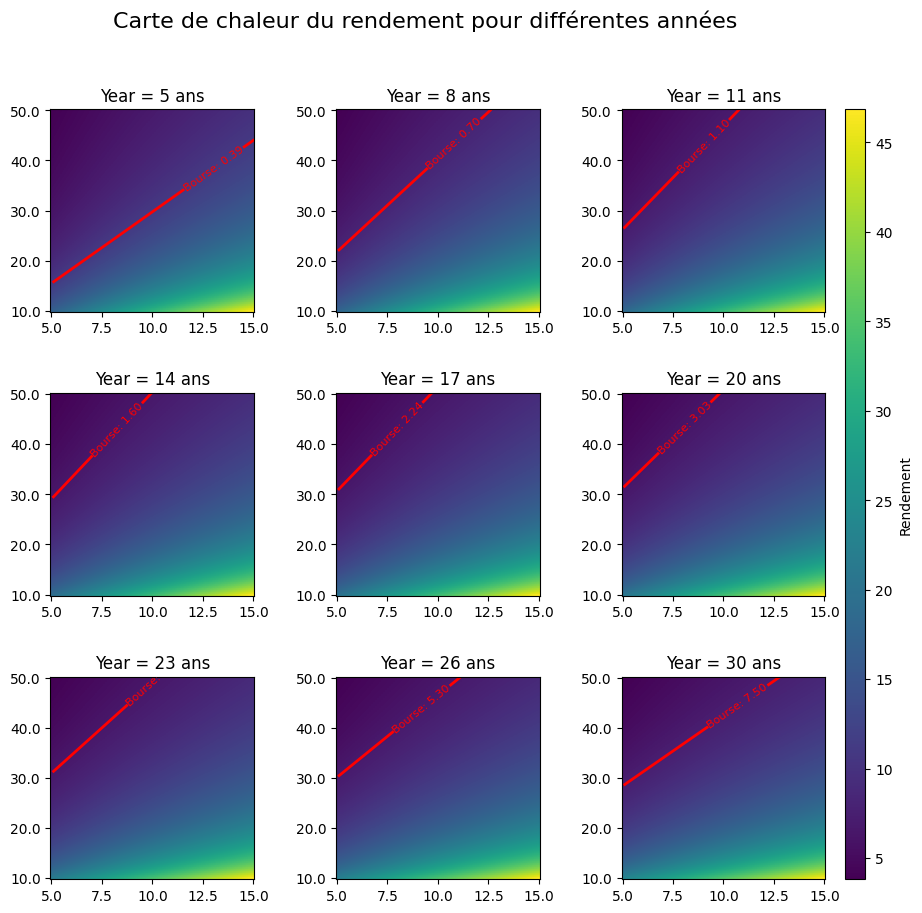

In [127]:
list_rho = 1e-2 * np.linspace(5, 15, 100)
list_taux_apport = 1e-2 * np.linspace(10, 50, 100)

# Définir les valeurs de year pour les mosaïques
years = np.linspace(5, 30, 9, dtype=int)  # 9 années entre 5 et 45

# Initialisation de la figure avec 9 sous-graphiques (mosaïque 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Carte de chaleur du rendement pour différentes années', fontsize=16)

# Boucle pour chaque valeur de year
for idx, year in enumerate(years):
    # Matrice pour stocker les résultats pour une année donnée
    matrice_resultats = np.zeros((len(list_taux_apport), len(list_rho)))

    # Calcul pour chaque combinaison de taux_apport et rho
    for idx_taux, taux_apport in enumerate(list_taux_apport):
        for idx_rho, rho in enumerate(list_rho):
            taux_apport, loyer, paiement_mens, valeur_bien, dette = rendement_2(taux_apport, rho/12, 12*year, fg, i, alpha, N, mu)
            rendement = 1 / taux_apport * (loyer - paiement_mens + valeur_bien - dette) - 1
            matrice_resultats[idx_taux, idx_rho] = rendement

    # Sélectionner le sous-graphe correspondant
    ax = axes[idx // 3, idx % 3]
    
    # Afficher la heatmap
    cax = ax.imshow(matrice_resultats, cmap='viridis', aspect='auto', origin='lower')
    
    # Ajuster les labels des axes
    ax.set_xticks(np.linspace(0, len(list_rho) - 1, 5))
    ax.set_xticklabels([f"{rho:.1f}" for rho in np.linspace(5, 15, 5)])
    ax.set_yticks(np.linspace(0, len(list_taux_apport) - 1, 5))
    ax.set_yticklabels([f"{taux_apport:.1f}" for taux_apport in np.linspace(10, 50, 5)])
    
    # Ajouter un titre pour chaque sous-graphe
    ax.set_title(f'Year = {year} ans')

    # Tracer le contour pour la valeur de la bourse
    perf_bourse = ((1 + beta) ** year - 1) * (1 - p)
    contour = ax.contour(matrice_resultats, levels=[perf_bourse], colors='red', linewidths=2, origin='lower')
    ax.clabel(contour, fmt=lambda x: f'Bourse: {x:,.2f}', colors='red', fontsize=8)

# Ajouter une barre de couleur partagée pour l'ensemble des sous-graphiques
cbax = fig.add_axes([0.92, 0.11, 0.02, 0.77])  # [left, bottom, width, height]
fig.colorbar(cax, cax=cbax, ax=axes, orientation='vertical', label='Rendement')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()